In [23]:
import pandas as pd
import os
import google.generativeai as genai
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

In [14]:
load_dotenv()
gemini_api_key = os.getenv('GEMINI_API_KEY')

df = pd.read_csv('data.csv')

df.head()


,tanggal,jumlah_penjualan,harga,kategori_produk
0,2028-08-21,10,150000,Elektronik
1,2028-08-20,12,200000,Pakaian
2,2028-08-19,8,100000,Buku
3,2028-08-18,15,120000,Elektronik
4,2028-08-17,9,180000,Perlengkapan Rumah Tangga


In [16]:
load_dotenv()
gemini_api_key = os.getenv('API_KEY')

genai.configure(api_key=gemini_api_key)
model = genai.GenerativeModel('gemini-pro')

df = pd.read_csv('data.csv')

prompt = f"Analisis jumlah total sales_amount untuk setiap kategori produk berdasarkan data penjualan\n\n{df.to_csv(index=False)}"

response = model.generate_content(prompt)

print(response.text)

**Analisis Jumlah Total sales_amount Berdasarkan Kategori Produk**

```
Kategori Produk | Total sales_amount
-----------------|------------------
Elektronik      | 18.942.000
Pakaian         | 4.000.000
Buku            | 600.000
Kecantikan      | 1.450.000
Perlengkapan Rumah Tangga | 3.980.000
```

Dari data tersebut, dapat disimpulkan bahwa kategori produk dengan jumlah total sales_amount terbanyak adalah **Elektronik**, diikuti oleh **Pakaian**, **Perlengkapan Rumah Tangga**, **Kecantikan**, dan **Buku**.


In [22]:
load_dotenv()
gemini_api_key = os.getenv('API_KEY')

genai.configure(api_key=gemini_api_key)
model = genai.GenerativeModel('gemini-pro')

df = pd.read_csv('data.csv')

prompt = f"Aku ingin mengetahui pola pembelian pelanggan, serta faktor-faktor yang mempengaruhi kenaikan atau penurunan pembelian pelanggan."

response = model.generate_content(prompt)

print(response.text)

**Pola Pembelian Pelanggan**

Pola pembelian pelanggan mengacu pada tren dan perilaku reguler di mana pelanggan melakukan pembelian. Ini dapat mencakup:

* Frekuensi pembelian (seberapa sering mereka membeli)
* Nilai pembelian rata-rata (berapa banyak yang mereka belanjakan setiap kali)
* Kategori produk yang dibeli
* Waktu dan hari pembelian

**Faktor-Faktor yang Mempengaruhi Pembelian Pelanggan**

Banyak faktor dapat mempengaruhi kenaikan atau penurunan pembelian pelanggan, termasuk:

**Faktor Internal:**

* **Kebutuhan dan keinginan:** Ini adalah pendorong utama pembelian. Pelanggan membeli produk atau layanan yang memenuhi kebutuhan atau keinginan mereka.
* **Motivasi:** Pelanggan mungkin termotivasi untuk membeli karena berbagai alasan, seperti kebutuhan, keinginan, atau penghargaan.
* **Sikap:** Sikap pelanggan terhadap suatu produk atau merek dapat mempengaruhi perilaku pembelian mereka.
* **Pengaruh pribadi:** Rekomendasi dan pengalaman orang lain dapat mempengaruhi persepsi pe

In [21]:
load_dotenv()
gemini_api_key = os.getenv('API_KEY')

genai.configure(api_key=gemini_api_key)
model = genai.GenerativeModel('gemini-pro')

df = pd.read_csv('data.csv')

prompt = f"Berdasarkan data historis penjualan yang sudah ada, buat prediksi untuk memperkirakan tren penjualan di masa depan."

response = model.generate_content(prompt)

print(response.text)

**Langkah-Langkah Prediksi Tren Penjualan:**

1. **Kumpulkan Data Historis:** Kumpulkan data penjualan masa lalu yang mencakup periode waktu yang cukup untuk mengidentifikasi pola.

2. **Bersihkan dan Siapkan Data:** Bersihkan data mentah dari anomali, kesalahan, dan nilai yang hilang. Siapkan data dalam format yang sesuai untuk analisis.

3. **Pilih Metode Prediksi:** Pilih metode prediksi yang sesuai berdasarkan jenis data, pola, dan sumber daya yang tersedia. Beberapa metode umum meliputi:
    - Regresi Linier Sederhana
    - Regresi Polinomial
    - Rata-rata Bergerak
    - Eksponensial Smoothing

4. **Buat Model Prediksi:** Buat model prediksi menggunakan metode yang dipilih dengan data historis. Model akan menghasilkan persamaan atau algoritme yang dapat digunakan untuk memperkirakan nilai di masa depan.

5. **Evaluasi Model:** Evaluasi model prediksi untuk akurasi menggunakan metrik seperti Mean Absolute Error (MAE) atau Root Mean Squared Error (RMSE). Model yang akurat akan mem

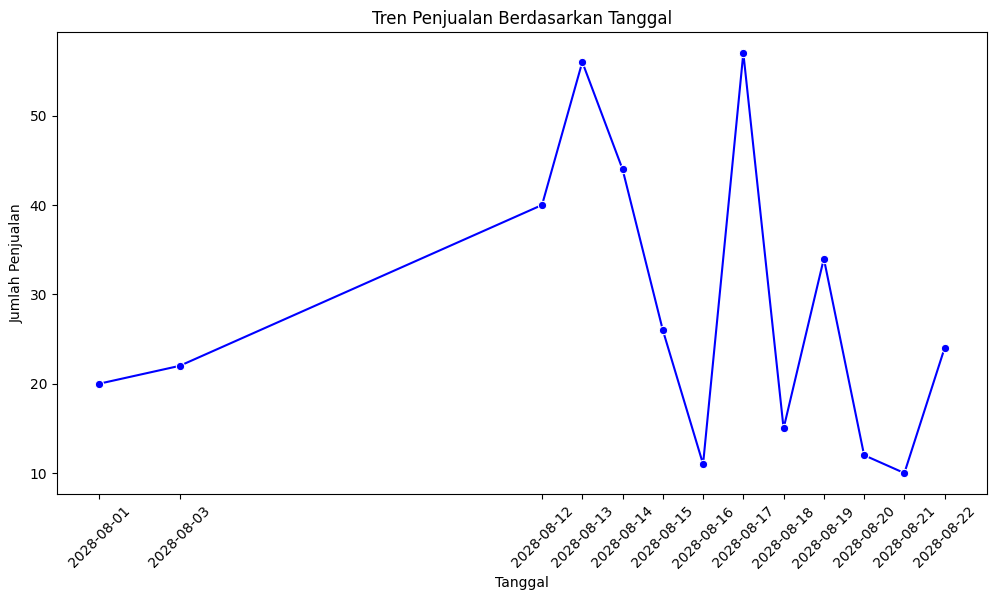

In [31]:
#sales trend by date
sales_by_date = df.groupby('tanggal')['jumlah_penjualan'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='tanggal', y='jumlah_penjualan', data=sales_by_date, marker='o', color='b')
plt.title('Tren Penjualan Berdasarkan Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.xticks(ticks=sales_by_date['tanggal'], labels=sales_by_date['tanggal'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.show()

kategori_produk
Buku                           5830000
Elektronik                   132850000
Kecantikan                    22100000
Pakaian                        7200000
Perlengkapan Rumah Tangga     39620000
Name: total_pendapatan, dtype: int64


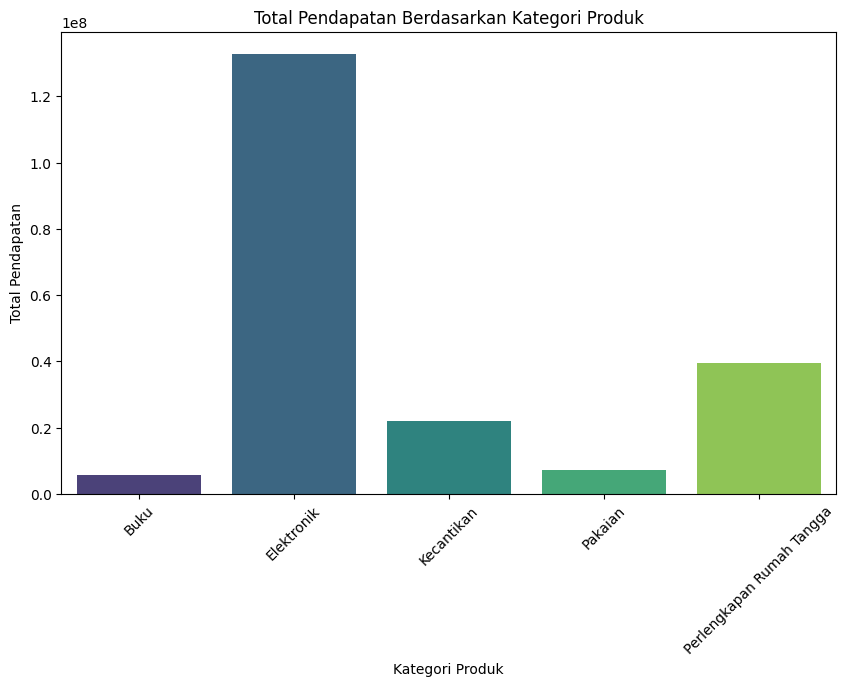

In [28]:
#total revenue by product category
df['total_pendapatan'] = df['jumlah_penjualan'] * df['harga']
revenue_by_category = df.groupby('kategori_produk')['total_pendapatan'].sum()
print(revenue_by_category)
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, hue=revenue_by_category.index, palette='viridis', dodge=False)
plt.title('Total Pendapatan Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)
plt.show()